# Ejercicios Pair Programming - Modulo 3 - Sprint 1 
## Lección 12 - Random Forest
### Pilar García y Sonia Ruiz Pérez

En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

En pairprogramming anteriores ajustastéis vuestro datos a una regresión lineal y a un Decision Tree. El objetivo de hoy es:
- Ajustar el modelo a un Random Forest
- Extraer las métricas
- Debatid entre vosotras que modelo es mejor y por qué (basándose en las métricas)

Happy coding 🤔

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

pd.options.display.max_columns=None

In [2]:
#Creamos el dataframe con el csv con nuestros datos.
df1 = pd.read_csv('files/taxis4_encoding.csv',index_col=0)
df1.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,tip_no_zeros,tip_box,passengers_robust,distance_robust,fare_robust,tolls_robust,total_robust,x0_green,x0_yellow,payment_cash,payment_credit_card,pickup_borough_oe,dropoff_borough_map
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2.150000e+00,0.787753,0.0,-0.022624,-0.294118,0.0,-0.127368,0,1,0,1,2,0
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,Upper West Side South,Upper West Side South,Manhattan,Manhattan,1.000000e-10,-10.996744,0.0,-0.389140,-0.529412,0.0,-0.511579,0,1,1,0,2,0
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,Alphabet City,West Village,Manhattan,Manhattan,2.360000e+00,0.886769,0.0,-0.126697,-0.235294,0.0,0.000000,0,1,0,1,2,0


In [3]:
# Vamos a quedarnos con las columnas originales, eliminamos las columnas normalizadas, estandarizas y también algunas
#  que no nos hacen falta para el modelo Random Forest
lista_eliminar = ['pickup', 'dropoff', 'pickup_zone', 'dropoff_zone', 'pickup_borough',
       'dropoff_borough', 'tip_no_zeros', 'tip_box', 'passengers_robust',
       'distance_robust', 'fare_robust', 'tolls_robust', 'total_robust', 'x0_green', 'payment_cash']

In [4]:
# Eliminamos las columnas no deseadas
df = df1.drop(lista_eliminar, axis=1)
df.head(3)

,passengers,distance,fare,tip,tolls,total,x0_yellow,payment_credit_card,pickup_borough_oe,dropoff_borough_map
0,1,1.60,7.0,2.15,0.0,12.95,1,1,2,0
1,1,0.79,5.0,0.00,0.0,9.30,1,0,2,0
2,1,1.37,7.5,2.36,0.0,14.16,1,1,2,0


In [5]:
# X: variables predictoras (independientes)
# y: variable respuesta (dependiente)
X = df.drop("tip", axis=1)
y = df["tip"]

In [6]:
# Dividir los datos en train y test
# random_state = 42 --> semilla, para que siempre tenga los mismos datos
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Definir diccionario con los hiperparámetros a modificar
# min_samples_split: número mínimo de observaciones que debe tener un nodo para dividirse, por defecto [10, 50, 100]
# min_samples_leaf: número mínimo de observaciones que debe tener cada uno de los nodos hijos para que se produzca la division, 
# por defecto [10, 50, 100]
param = {"max_depth": [2,5,9], "max_features": [1,2,3,4], "min_samples_split": [10, 50, 100], "min_samples_leaf": [10,50,100]}

In [8]:
# Ajustar el modelo con GridSearchCV
# cv = 10 --> número de veces que hacemos la validación
# verbose = - 1 --> para no printear ningún mensaje en la pantalla
grid_forest = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param, cv=10, verbose=-1,
    return_train_score=True, scoring="neg_mean_squared_error")

In [9]:
# Ajustar el modelo
grid_forest.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 5, 9], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [10]:
# El método nos dice cuál es el mejor modelo,
bosque = grid_forest.best_estimator_
bosque

RandomForestRegressor(max_depth=9, max_features=4, min_samples_leaf=10,
                      min_samples_split=10)

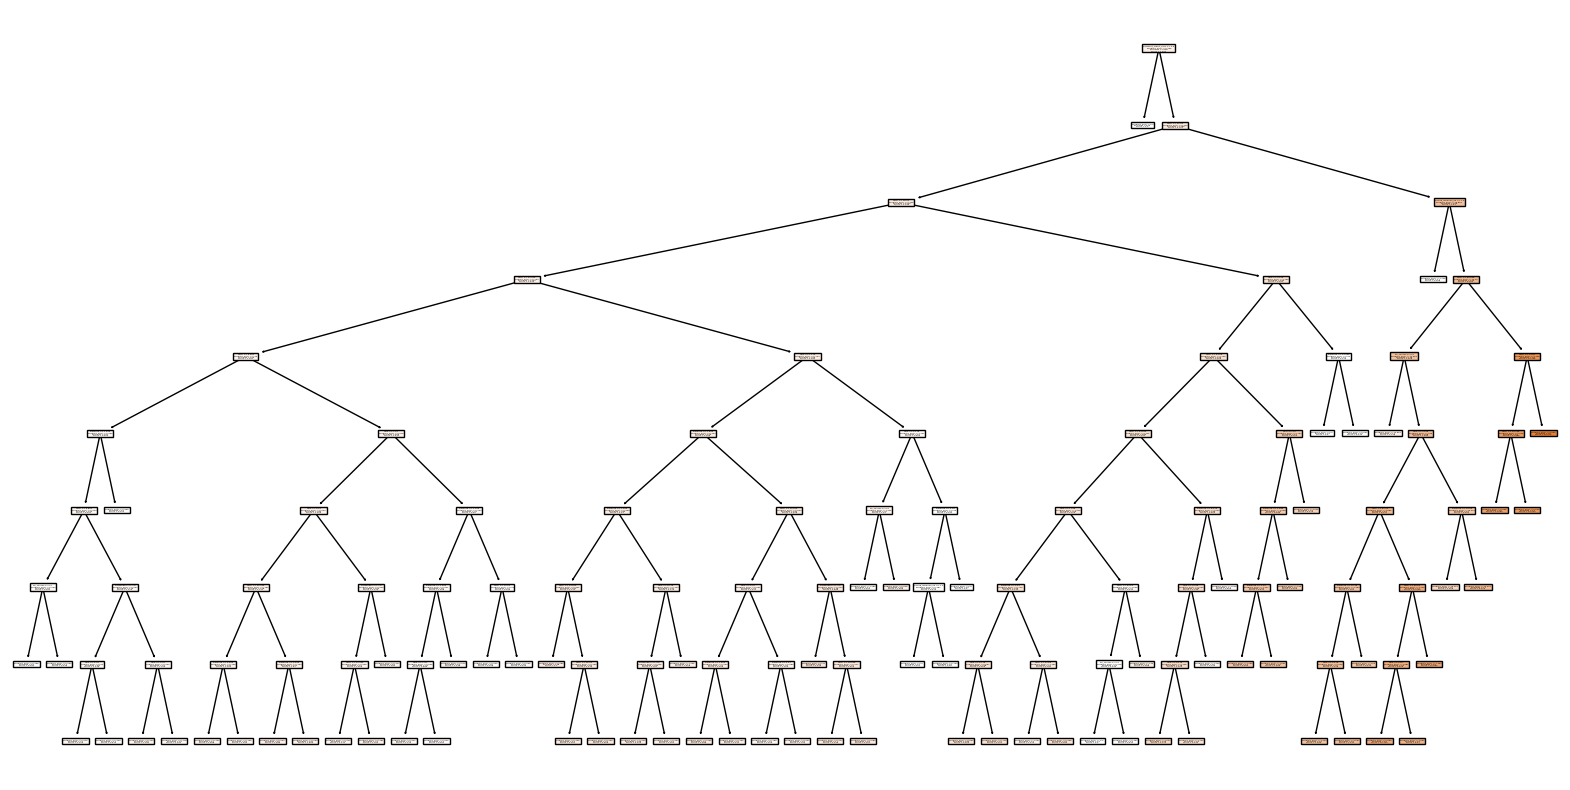

In [11]:
#Representamos gráficamente el Random Forest, pero solo representaremos un árbol de ejemplo.
plt.figure(figsize=(20,10))
tree.plot_tree(bosque.estimators_[3],feature_names=x_train.columns,filled=True)
plt.show()

In [12]:
# Predicción para los datos de entrenamiento
y_predict_train = bosque.predict(x_train)

In [13]:
# Predicción para los datos de test
y_predict_test = bosque.predict(x_test)

In [14]:
def obtener_metricas(y_test_m, y_train_m, y_predict_test_m, y_predict_train_m, modelo):
    # En un diccionario, calcular las métricas de train y test
    resultados_metricas = {
        'MAE': [mean_absolute_error(y_test_m, y_predict_test_m), mean_absolute_error(y_train_m, y_predict_train_m)],
        'MSE': [mean_squared_error(y_test_m, y_predict_test_m), mean_squared_error(y_train_m, y_predict_train_m)],
        'RMSE': [np.sqrt(mean_squared_error(y_test_m, y_predict_test_m)), np.sqrt(mean_squared_error(y_train_m, y_predict_train_m))],
        'R2':  [r2_score(y_test_m, y_predict_test_m), r2_score(y_train_m, y_predict_train_m)],
        "set": ["test", "train"], 
        "modelo": [modelo, modelo]}

    # Pasamos a dataframe el diccionario para su mejor visualizacion
    df_resultados_metricas = pd.DataFrame(resultados_metricas)

    return df_resultados_metricas

In [15]:
# Llamamos a la función 
df_resultado = obtener_metricas(y_test, y_train, y_predict_test, y_predict_train, "Random Forest Regressor")
df_resultado

,MAE,MSE,RMSE,R2,set,modelo
0,0.448130,0.840539,0.916809,0.840596,test,Random Forest Regressor
1,0.422818,0.686232,0.828391,0.878626,train,Random Forest Regressor


`Como podemos observar el R2 del método Random Forest nos indica un resultado aceptable ya que existe una variación del 5% siendo en ambas bastante altas aunque superior en train. En el resto de métricas también son mejores en train que en test, ya que son menores. Aún así los resultados obtenidos indican una buena bondad de nuestro modelo, ya que el valor de RMSE en test y train nos dice que la predicción de nuestra variable respuesta (tip-propina) varía menos de 1$.`

In [16]:
# Importamos los resultados de las métricas obtenidos en el Decision Tree para poderlos comparar con los obtenidos en el Random Forest.
metricas_decision=pd.read_csv('files/resultados_taxis_decisiontree.csv',index_col=0)
metricas_decision

,MAE,MSE,RMSE,R2,set,modelo
0,0.244405,0.662005,0.813637,0.874454,test,Decision Tree Regressor
1,0.000789,0.000296,0.017197,0.999948,train,Decision Tree Regressor
0,0.244405,0.662005,0.813637,0.874454,test,Decision Tree Regressor 1
1,0.000789,0.000296,0.017197,0.999948,train,Decision Tree Regressor 1
0,0.244405,0.662005,0.813637,0.874454,test,Decision Tree Regressor 2
1,0.000789,0.000296,0.017197,0.999948,train,Decision Tree Regressor 2


In [17]:
# Unimos los datos de las métricas obtenidas en el Random Forest con las métricas obtenidas con el Decision Tree.
df_resultado_unido=pd.concat([df_resultado,metricas_decision],axis=0)
df_resultado_unido

,MAE,MSE,RMSE,R2,set,modelo
0,0.448130,0.840539,0.916809,0.840596,test,Random Forest Regressor
1,0.422818,0.686232,0.828391,0.878626,train,Random Forest Regressor
0,0.244405,0.662005,0.813637,0.874454,test,Decision Tree Regressor
1,0.000789,0.000296,0.017197,0.999948,train,Decision Tree Regressor
0,0.244405,0.662005,0.813637,0.874454,test,Decision Tree Regressor 1
1,0.000789,0.000296,0.017197,0.999948,train,Decision Tree Regressor 1
0,0.244405,0.662005,0.813637,0.874454,test,Decision Tree Regressor 2
1,0.000789,0.000296,0.017197,0.999948,train,Decision Tree Regressor 2


`Vemos que las mejores métricas obtenidas son las realizadas con el método Random Forest. Por tanto, nuestro modelo predictor a utilizar será el Random Forest.`

In [18]:
#Obtenemos la importancia de las variables predictoras.
importancia_predictoras=pd.DataFrame({'predictora':x_train.columns,'importancia':bosque.feature_importances_})

#Ordenamos de mayor a menor los resultados de las importancias.
importancia_predictoras.sort_values(by=['importancia'],ascending=False,inplace=True)
importancia_predictoras

,predictora,importancia
4,total,0.389915
6,payment_credit_card,0.295244
2,fare,0.115546
1,distance,0.065536
3,tolls,0.059783
5,x0_yellow,0.048006
7,pickup_borough_oe,0.024688
0,passengers,0.001283
8,dropoff_borough_map,0.000000


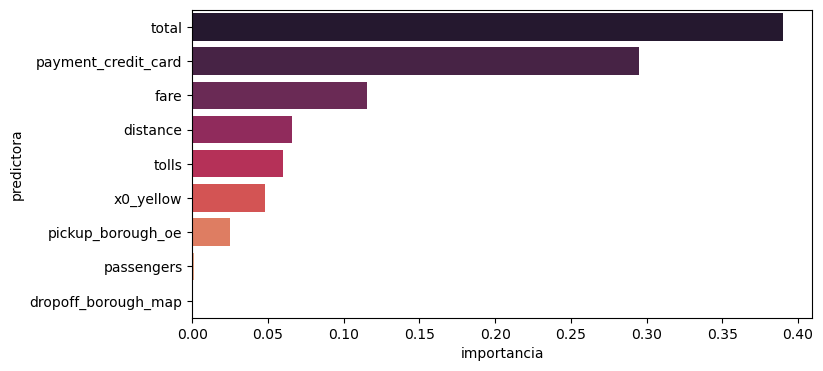

In [19]:
#Representación gráfica de la importancia.
plt.figure(figsize=(8,4))
sns.barplot(x='importancia',y='predictora',data=importancia_predictoras,palette='rocket')
plt.show();

`Observamos que las variables con mayor importancia sobre la variable dependiente son: 'total' y 'payment_credit_card'.`

In [20]:
#Guardamos los resultados de las métricas obtenidas con el Random Forest en un csv.
df_resultado.to_csv('files/resultados_taxis_randomforest.csv')

In [21]:
#Guardamos los resultados de las métricas obtenidas con Decision Tree y Random Forest en un csv.
df_resultado_unido.to_csv('files/resultados_taxis_decisiontree_randomforest.csv')